# DarkCapPy Template

Author: Adam Green

Email : agree019@ucr.edu

Date: 8/7/18

## Introduction

This package is set up to perform "out-of-the-box" calculations. Some calculations, in particular the reach plot for IceCube, may take hours of run time. If the time intensive calculations are interrupted, they must be restarted from the beginning. This notebook is a guide to using the package to perform time-intensive parameter scans. This package is optimized to perform parameter scans over mediator mass $m_{A'}$ and kinetic mixing $\varepsilon$ for a fixed dark matter mass $m_X$.

This notebook utilizes [pandas](https://pandas.pydata.org/) to read and write intermediate results to external comma-separated-value (csv) files. These files allow longer calculations to be interrupted and resumed, even if the Jupyter kernel is restarted.

This notebook generates 2 csv files, which we refer to as $\texttt{Sommerfeld.csv}$ and $\texttt{Signal.csv}$. It requires input from a third csv file which we refer to as $\texttt{Branch.csv}$.

This notebook is divided into four main sections titled Package Test, Sommerfeld, Equilibrium Plots, and IceCube Signal. We provide a brief overview of each section below.

#### Package Test

This section tests the package installation by calculating the number of signal events expected at IceCube for a fixxed set of parameters - dark matter mass, mediator mass, mediator coupling, and IceCube observation time. It outputs all intermediate results. This section fully demonstrates how to use DarkCapPy for calculations of the "dark Earthshine" scenario of a single set of parameters.

_Estimated Run Time_: 4 Minutes

#### Sommerfeld

#### Sommerfeld

This section creates and populates $\texttt{Sommerfeld.csv}$ with 

1. A single value of the dark matter mass $m_X$ in GeV, 
2. A list of mediator masses $m_{A'}$ in GeV
3. A list of corresponding thermally averaged Sommerfeld enhancements $\langle S_S(m_{A'}) \rangle$ 
4. The part of the capture rate which only depends on $m_X$ and $\alpha_X$ $\kappa_0$ in units of GeV$^5$, $\kappa_0$.

The user is prompted to input a value of $m_X$ when $\texttt{Sommerfeld.csv}$ is created. A list of mediator masses, $m_{A'}$ , are used to generate corresponding values of the thermally averaged Sommerfeld effect, $\langle S_S \rangle$. The quantity $\kappa_0$ depends only on $m_X$ and $\alpha_X$. When $m_X$ is fixed, $\kappa_0$ is uniquely determined by fixing $\alpha_X$ to give the correct dark matter abundance from thermal freeze out. The $\texttt{Sommerfeld.csv}$ file generated from this section is used as input for all later parts of this notebook.

_Estimated Run Time_: 6 Minutes

#### Equilibrium Plots

This section reads in a completed $\texttt{Sommerfeld.csv}$ and generates plots of the equilibrium time in $(\varepsilon, m_{A'})$ space. The equilibrium time $\tau$ is the time it takes the captured dark matter population to reach a stable value. By default, we plot contour values of $\tau/\tau_\oplus = \{ 10^{-4} ,10^{-2}, 10^0, 10^2, 10^4 \}$. Where $\tau_\oplus = 4.5$ GYr is the age of the Earth.

_Estimated Run Time_:

#### IceCube Signal

This section creates and populates $\texttt{Signal.csv}$ file that stores values pertaining to the number of signal events at IceCube. This section is the most time consuming and computation intensive section. This is because the typial resolution of these plots requires $\mathcal{O}(10^4)$ calculations.

This section reads in (1) $\texttt{Sommerfeld.csv}$ and (2) $\texttt{Branch.csv}$ and outputs $\texttt{Signal.csv}$ which stores the range of mediator masses mass. 

When the calculations are complete, this section also reads in a completed $\texttt{Signal.csv}$ file and plots order-of-magnitude contours of the number of signal events at IceCube $N_\text{sig}$ against mediator mass $m_{A'}$ on the horizontal axis and kinetic mixing parameter $\varepsilon$ on the vertical axis. By default, the contour values are $N_\text{sig} = \{ 1, 10, 100, 1000 \}$.

As a benchmark, the calculation rate on a modern laptop is about 140 points / minute.

## Imports and Initialization

In the following, we import the required libraries and define the paths to each data file. 

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
from datetime import datetime

from DarkCapPy import *
import DarkCapPy.DarkPhoton as DP

import time
import seaborn as sns

###################
# Define File Paths
###################
# These paths are specific to the preset folders in Temp;ate_Caluclation
def sommerfeldPath(file):
    path = 'Sommerfeld/' + file
    return path

def branchPath(file):
    path = 'Branching_Ratio/' + file
    return path

def signalPath(file):
    path = 'Signal/' + file
    return path
    
def signalBackupPath(file):
    path = 'Signal/Signal_Backups/' + file
    return path

print ('Complete')

/home/bellis/micromamba/envs/pyhep/lib/python3.11/site-packages/DarkCapPy/Configure/PlanetData.py:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Planet_File = pd.read_csv(Planet_Path,  delim_whitespace=True, header = 8)


Dark Photon Module Imported
Complete


# Package Test  (Single Parameter Point)

This section is a self-contained test of `DarkCapPy`. It outputs the inermediate results and total number of singnal events for a set of model parameters.

We initliaize our parameters to match the values chosen for Table 1 of [arXiv:1509.07525](https://arxiv.org/abs/1509.07525) and generate the corresponding $N_\text{sig}$ point in $(m_{A'}, \varepsilon)$ space, taking the effective area of IceCube to be $A_\text{eff} = 1$ km$^2$ and the observation time to be $T = 10$ yr. All masses and energies are assumed to be in units of GeV. 

For Earth, this cell takes about 6 minutes to run.

For a single element in the Sun, this cell takes about 6 minutes to run.

Input parameters:

    mx       = 1000
    ma       = 1
    epsilon  = 1e-8
    alpha    = 1/137
    alphax   = 0.035
    tauCross = DP.tauCross = 1.41912e+17

The anticipated output for Earth is:

    Capture_1            : 109069092.29572794
    Kappa_0              : 3.116357975166786e+25
    Capture_2            : 109072529.13083751
    Therm Avg Sommerfeld : 238.71863691039448
    Sigma V              : 3.8484490764205524e-09
    Annihilation         : 1.8311290915841913e-46
    EQ Time              : 7.07603006302535e+18
    Gamma_ann            : 21928.76449347939
    Decay Length         : 82568160.0
    Epsilon_decay        : 5.393699655806077e-07
    N_signal             : 0.01462555822956747

In [2]:
time.time()

1751739683.8699224

In [3]:
# Check to make sure we are using the correct versions of thing

# The Earth is about 6000 km in radius

print(f'Planet mass:   {DP.Planet_Mass} grams')
print(f'Planet radius: {DP.Planet_Radius} cm')
print(f'Planet radius: {DP.Planet_Radius/1e5} km')

Planet mass:   5.972e+27 grams
Planet radius: 637100000.0 cm
Planet radius: 6371.0 km


In [4]:
df_k1 = pd.read_parquet('different_kappas_MANY_MX_MASSES.parquet')
df_k2 = pd.read_parquet('different_kappas_TEST.parquet')
df_k3 = pd.read_parquet('different_kappas_HIGH_MX_MASSES.parquet')

print(df_k1.iloc[0:3])
print(df_k2.iloc[0:3])

print('------------------------')
print(df_k1.iloc[28:31])
print(df_k2.iloc[28:31])
print(df_k3.iloc[0:3])

print('------------------------')
print(df_k1.iloc[-3:])
print(df_k2.iloc[-3:])
print(df_k3.iloc[-3:])


     mx        kappa0
0  10.0  1.601475e+27
1  20.0  1.725824e+28
2  30.0  2.798070e+28
     mx        kappa0
0  10.0  1.260034e+37
1  20.0  1.089069e+37
2  30.0  9.070067e+36
------------------------
         mx        kappa0
28  10000.0  3.100195e+23
29  20000.0  7.750207e+22
30  30000.0  3.444513e+22
         mx        kappa0
28  20000.0  4.292460e+32
29  30000.0  1.915517e+32
30  40000.0  1.079662e+32
        mx        kappa0
0  10000.0  3.100195e+23
1  20000.0  7.750207e+22
2  30000.0  3.444513e+22
------------------------
           mx        kappa0
44   800000.0  4.843817e+19
45   900000.0  3.827214e+19
46  1000000.0  3.100043e+19
           mx        kappa0
43   800000.0  2.714728e+29
44   900000.0  2.145042e+29
45  1000000.0  1.737531e+29
           mx        kappa0
16   800000.0  4.843817e+19
17   900000.0  3.827214e+19
18  1000000.0  3.100043e+19


In [5]:
mx = 1000000
ma = 0.30
epsilon = 1e-8
alpha = 1/137
#alphax = 0.035
tauCross = DP.tauCross

#start = time.time()
#print("Starting cCap...")
#cap1 = DP.cCap(mx,ma,epsilon,alpha,alphax)
#print(f"Finished in {time.time() - start:.2f} seconds")
#print ('Capture_1            :', cap1)



In [6]:
#start = time.time()
#print("Starting kappa0...")
#kappa0 = DP.kappa_0(mx,alpha)
#print(f"Finished in {time.time() - start:.2f} seconds")
#print ('Kappa_0              :', kappa0)



#######################
# for testing
#######################
#'''
#df_kappa = pd.read_parquet('different_kappas_03052025_many_mxs.parquet')
df_kappa = pd.read_parquet('different_kappas_MANY_MX_MASSES.parquet')

# Regenerated at home
#df_kappa = pd.read_parquet('different_kappas_TEST.parquet')

filter = df_kappa['mx'] == mx
kappa0 = df_kappa[filter]['kappa0'].values[0]
print ('Kappa_0              :', kappa0)
print()

df_kappa
#'''

Kappa_0              : 3.1000430010845934e+19



,mx,kappa0
0,10.0,1.601475e+27
1,20.0,1.725824e+28
2,30.0,2.798070e+28
3,40.0,4.303398e+28
4,50.0,4.130456e+29
5,60.0,1.372038e+29
6,70.0,3.161709e+28
7,80.0,1.449647e+28
8,90.0,8.590318e+27
9,100.0,5.797834e+27


In [7]:
start = time.time()
print("Starting cCapQuick...")
alphax = DP.alphaTherm(mx, ma)
cap2 = DP.cCapQuick(mx,ma,epsilon,alphax,kappa0)
print(f"Finished in {time.time() - start:.2f} seconds")
print ('Capture_2            :', cap2)



Starting cCapQuick...
Finished in 0.00 seconds
Capture_2            : 9350247.020987496


In [8]:
start = time.time()
print("Starting sommerfeld...")

sommerfeld = DP.thermAvgSommerfeld(mx,ma,alphax)

print(f"Finished in {time.time() - start:.2f} seconds")
print ('Therm Avg Sommerfeld :', sommerfeld)


Starting sommerfeld...
Finished in 0.00 seconds
Therm Avg Sommerfeld : 2042282882.5173628


In [9]:

start = time.time()
print("Starting sigma...")
sigma = DP.sigmaVtree(mx,ma,alphax)
print(f"Finished in {time.time() - start:.2f} seconds")
print ('Sigma V              :', sigma)


Starting sigma...
Finished in 0.00 seconds
Sigma V              : 1.875126810526317e-09


In [10]:

start = time.time()
print("Starting the others...")

ann = DP.cAnn(mx,sigma,sommerfeld)

# Use cap2!!!!

tau = DP.tau(cap2,ann)
gammaAnn = DP.gammaAnn(cap2,ann)
L = DP.decayLength(mx,ma,epsilon,1)
Edecay = DP.epsilonDecay(L)

signal = DP.iceCubeSignal(gammaAnn,Edecay,DP.yr2s(10))
print(f"Finished in {time.time() - start:.2f} seconds")
print()

#print ('Capture_1            :', cap1)
print ('Kappa_0              :', kappa0)
print ('Capture_2            :', cap2)
print ('Therm Avg Sommerfeld :', sommerfeld)
print ('Sigma V              :', sigma)
print ('Annihilation         :', ann)
print ('EQ Time              :', tau)
print ('Gamma_ann            :', gammaAnn)
print ('Decay Length         :', L)
print ('Epsilon_decay        :', Edecay)
print ('N_signal             :', signal)

Starting the others...
Finished in 0.00 seconds

Kappa_0              : 3.1000430010845934e+19
Capture_2            : 9350247.020987496
Therm Avg Sommerfeld : 2042282882.5173628
Sigma V              : 1.875126810526317e-09
Annihilation         : 2.413756370020122e-35
EQ Time              : 66564357021195.07
Gamma_ann            : 4675123.510493748
Decay Length         : 917424000000.0
Epsilon_decay        : 1.089251798758184e-07
N_signal             : 0.6296988541709363


In [11]:

# 


# 
# ann = DP.cAnn(mx,sigma,sommerfeld)

# tau = DP.tau(cap1,ann)

# gammaAnn = DP.gammaAnn(cap1,ann)
# L = DP.decayLength(mx,ma,epsilon,1)
# Edecay = DP.epsilonDecay(L)

# signal = DP.iceCubeSignal(gammaAnn,Edecay,DP.yr2s(10))


#print ('Capture_1            :', cap1)
# print ('Kappa_0              :', kappa0)
# print ('Capture_2            :', cap2)
# print ('Therm Avg Sommerfeld :', sommerfeld)
# print ('Sigma V              :', sigma)
# print ('Annihilation         :', ann)
# print ('EQ Time              :', tau)
# print ('Gamma_ann            :', gammaAnn)
# print ('Decay Length         :', L)
# print ('Epsilon_decay        :', Edecay)
# print ('N_signal             :', signal)

# Sommerfeld

This section creates $\texttt{Sommerfeld.csv}$ that contains an user-defined number of $m_A$ and $\langle S_S \rangle$ values. 

$\texttt{Sommerfeld.csv}$ has the following column headers:

    Counter, mX[GeV], mA[GeV], ThermAvgSommerfeld, Kappa0[GeV5]

- `Counter`: Stores the current row of the csv. This will be used as a loop index later.
- `m_X[GeV]`: Dark matter mass in GeV specified at the prompt in [Create Sommerfeld.csv](#Create-Sommerfeld.csv).
- `m_A[GeV]`: A list of numbers ranging from $0.01$ GeV to $10$ GeV with arbitrary spacing. Since these will each correspond to a single values of $\langle S_S \rangle$ to be interpolated later, we suggest using logarithmic spacing with a high density `num_Somm ~ 2500`.
- `ThermAvgSommerfeld`: The corresponding Sommerfeld enhancement $\langle S_S \rangle$ for a given $m_{A'}$ value.
- `Kappa0[GeV5]`: The part of the capture rate which only depends on $m_X$ and $\alpha$ after the small recoil energy approximation. Once $m_X$ is fixed, this value is uniquely determined.

## Define Sommerfeld Point Resolution

This cell defines the variable `num_Somm`, the resolution of the Sommerfeld enhancement. This number should be ~2500 because it is used to create an interpolation of the Sommerfeld enhancement $\langle S_S \rangle$. This interpolation, as opposed to the function `DarkCapPy.DarkPhoton.thermAvgSomm`, is called to calculate the number of signal events. 

In [12]:
num_Somm = 2500

## Initialize Paramter Arrays

We assume the following range for $m_{A'}$:

$$ 0.01 \ \text{GeV} \leq m_{A'} \leq 10 \ \text{GeV} $$

This will use this range for the mediator mass for the rest of the calculations. The lower bound is fixed by requiring the dark photon to decay into electrons. The upper bound is adjusted to allow the dark photons to be relativistic when they are produced from dark matter annihilations. 

In [13]:
m_ALow = 10**-2
m_AHigh= 10

mALogRange = np.logspace(np.log10(m_ALow), np.log10(m_AHigh), num_Somm, base = 10)
mAArray = []

counter = 0
for mATemp in mALogRange:
                 #( Counter, m_X[GeV], m_A[Gev], ThermAvgSommerfeld, Kappa0[GeV5])
    mAArray.append([counter, ' '     , mATemp  , 'None'            , ' '])
    counter += 1

print ('Complete')

Complete


## Create Sommerfeld.csv

Filenames should follow a consistent convention since they will be used as input later on. A good convention for file names is:

    <#><Unit>Sommerfeld.csv

including the ".csv" extension at the prompt.

For example, if $m_X = 100$ GeV, a good filename would be something like:

    100GeVSommerfeld.csv
   

In [14]:
mX = 100 # Mass of DM candidate in GeV/c^2

masterSommerfeldDataFrame = \
    pd.DataFrame(mAArray,\
                 columns = \
                 ['Counter','mX[GeV]', 'mA[GeV]', 'ThermAvgSommerfeld', 'Kappa0[GeV5]'])

#sommFileName = input('Sommerfeld Filename: ')
sommFileName = f"{mX}GeVSommerfeld.csv"

if (sommFileName == ''):
    print ('Setting default filename')
    sommFileName = 'Sommerfeld_DEFAULT.csv'
writeFile = sommerfeldPath(sommFileName)

assert (sommFileName[-4:] == '.csv'), 'File must end with ".csv"'


masterSommerfeldDataFrame.to_csv(writeFile, index=False)
dataFrame = pd.read_csv(writeFile , sep = ',')
#m_XValue = float(input('m_X [GeV]: '))

m_XValue = float(mX)

kappa0Value = 'None'


dataFrame.at[0, 'mX[GeV]'] = m_XValue
dataFrame.at[0, 'Kappa0[GeV5]'] = kappa0Value

dataFrame.to_csv(writeFile, index=False)


print ('Complete')

Complete


## Populating Sommerfeld.csv

This cell calculates:

1. `Kappa0[GeV5]` = $\kappa_0$, the part of the capture rate which is constant in $(m_{A'},\varepsilon)$ space.

2. `ThermAvgSommerfeld` = $\langle S_S(m_{A'}) \rangle$, the thermally-averaged Sommerfeld enhancement for each corresponding value of $m_A$.

After each value of $\langle S_S \rangle$ is calculated, the $\texttt{Sommerfeld.csv}$ is updated and overwritten. This cell should take about 5 minutes.

In [15]:
#sommFileName = input('Sommerfeld Filename: ')
sommWriteFile = sommerfeldPath(sommFileName)
sommDataIn = pd.read_csv(sommWriteFile,sep = ',')

print (sommFileName)
print (sommWriteFile)

# Define the loop range
looprange = len(sommDataIn['Counter'])

# Read in m_X value
Filem_X = float(sommDataIn.at[0,'mX[GeV]'])


# Read in the kappa0 from elsewhere
#df_in = pd.read_parquet('different_kappas.parquet')
#df_in = pd.read_parquet('different_kappas_TEST.parquet')
df_kappa = pd.read_parquet('different_kappas_MANY_MX_MASSES.parquet')


filter = df_kappa['mx'] == mX
kappa0Value = df_kappa[filter]['kappa0'].values[0]



#'''    
##################################
# Calculate Kappa0 and write it. 
##################################
testKappa0 = sommDataIn.at[0,'Kappa0[GeV5]']

print(f"Read in {Filem_X}  {testKappa0}")

if (testKappa0 != testKappa0):
    print ('Calculating Kappa0...')
    
    #kappa0Value = float(DP.kappa_0(Filem_X, 1./137))
    kappa0Value = df_kappa[filter]['kappa0'].values[0]
    
    sommDataIn.at[0, 'Kappa0[GeV5]'] = kappa0Value
    sommDataIn.to_csv(sommWriteFile, index=False)
    print('Kappa0 value calculated and set')
    
elif (testKappa0 == testKappa0):
    print ('Kappa0 value already calculated')
#'''

##################################
# Calculate the Sommerfeld enhancements
##################################

finishedCounter = 0
print ('-------------------')
print ('Starting Sommerfeld Calculations...')
for index in range(0,looprange):
    ##################################
    # Initialize Parameters
    ##################################
    m_AValue = sommDataIn.at[index,'mA[GeV]']
    testSomm = sommDataIn.at[index,'ThermAvgSommerfeld']
    
    if (testSomm != testSomm):    
        alpha_X = DP.alphaTherm(Filem_X, m_AValue)
        thermAvgSomm = DP.thermAvgSommerfeld(Filem_X, m_AValue, alpha_X)

        sommDataIn.at[index,'ThermAvgSommerfeld'] = thermAvgSomm
        sommDataIn.to_csv(sommWriteFile, index=False)

        finishedCounter +=1
        if (index%20 == 0):
            print ('Index: {0} recorded'.format(index))
        
    elif(testSomm == testSomm):
        finishedCounter +=1
        
    if (finishedCounter == looprange):
        print ('-------------------')
        print ('All Calculations Complete')
        
    
sommDataIn.to_csv(sommWriteFile, index=False)
print ('Complete')

100GeVSommerfeld.csv
Sommerfeld/100GeVSommerfeld.csv
Read in 100.0  nan
Calculating Kappa0...
Kappa0 value calculated and set
-------------------
Starting Sommerfeld Calculations...
Index: 0 recorded
Index: 20 recorded
Index: 40 recorded
Index: 60 recorded
Index: 80 recorded
Index: 100 recorded
Index: 120 recorded
Index: 140 recorded
Index: 160 recorded
Index: 180 recorded
Index: 200 recorded
Index: 220 recorded
Index: 240 recorded
Index: 260 recorded
Index: 280 recorded
Index: 300 recorded
Index: 320 recorded
Index: 340 recorded
Index: 360 recorded
Index: 380 recorded
Index: 400 recorded
Index: 420 recorded
Index: 440 recorded
Index: 460 recorded
Index: 480 recorded
Index: 500 recorded
Index: 520 recorded
Index: 540 recorded
Index: 560 recorded
Index: 580 recorded
Index: 600 recorded
Index: 620 recorded
Index: 640 recorded
Index: 660 recorded
Index: 680 recorded
Index: 700 recorded
Index: 720 recorded
Index: 740 recorded
Index: 760 recorded
Index: 780 recorded
Index: 800 recorded
Inde

In [16]:
#df_kappas = pd.read_parquet('different_kappas.parquet')

#df_kappas

### Manual Overwrite

Should the previous cell take longer than is feasable, the caculation may be interrupted at any time by interrupting the Jupyter kernel (`esc I,I`). If the interruption occurs during the `to_csv` command, $\texttt{Sommerfeld.csv}$ will be blank and it would appear that all the calculations have been lost. However, the dataframe is still stored in Jupyter memory. Manually writing this memory to $\texttt{Sommerfeld.csv}$ will guarantee prevent this data from being lost.

In [17]:
'''
print ('Working Sommerfeld file: {0}'.format(sommWriteFile))

overwrite = input('Overwrite? (y/n): ')
if ((overwrite == 'y') or (overwrite == 'Y')):
    sommDataIn.to_csv(sommWriteFile, index=False)
    print ('Overwrite complete')
    
else:
    print ('Overwrite aborted')


print ('Complete')
'''

"\nprint ('Working Sommerfeld file: {0}'.format(sommWriteFile))\n\noverwrite = input('Overwrite? (y/n): ')\nif ((overwrite == 'y') or (overwrite == 'Y')):\n    sommDataIn.to_csv(sommWriteFile, index=False)\n    print ('Overwrite complete')\n    \nelse:\n    print ('Overwrite aborted')\n\n\nprint ('Complete')\n"

## Plot Sommerfeld Data

This cell:

1. Reads in a completed $\texttt{Sommerfeld.csv}$ file

2. Plots the thermally-averaged Sommerfeld effect against mediator mass

If $\texttt{Sommerfeld.csv}$ isn't fully populated, i.e., the calculations have not been finished, Python will throw the following error:
```python
AttributeError: 'str' object has no attribute 'log10'
```

Complete


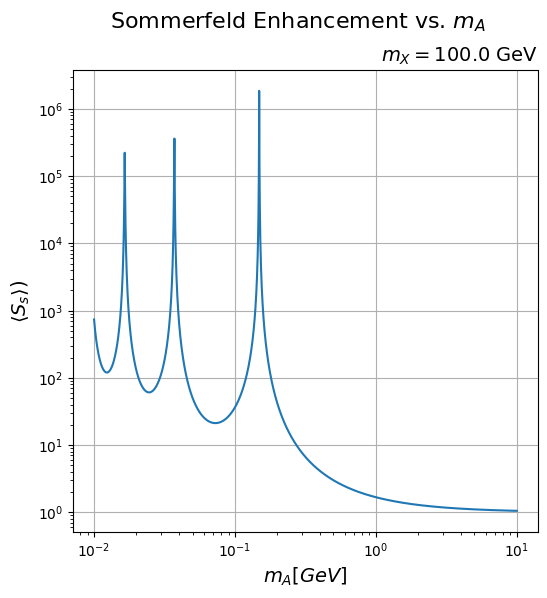

In [18]:
##################################
# Read in Sommerfeld CSV
##################################
#sommFile = input('Sommerfeld File: ')
sommFile = sommFileName
readFile = sommerfeldPath(sommFile)

dataIn = pd.read_csv(readFile, sep = ',')


#####################
# Extract Plot Data
#####################
mAList = dataIn['mA[GeV]']
SommerfeldList = dataIn['ThermAvgSommerfeld']
Filem_X = float(dataIn.loc[0,'mX[GeV]'])

##################################
# Determine the diplay Units of m_X 
##################################
m_XUnit = 'None'
if (Filem_X < 1000):
    m_XDisplay = Filem_X
    m_XUnit = 'GeV'

if (Filem_X >= 1000):
    m_XDisplay = Filem_X*10**-3
    m_XUnit = 'TeV'

#####################
# Plot
#####################
sommFig = plt.figure(figsize = (6,6))
#Plot = plt.plot(np.log10(mAList),np.log10(SommerfeldList))
plt.ylabel(r'$\log( \langle S_s \rangle $', fontsize = 14)
plt.xlabel(r'$\log( m_A ) [GeV]$', fontsize = 14)

Plot = plt.plot(mAList,SommerfeldList)
plt.ylabel(r'$\langle S_s \rangle )$', fontsize = 14)
plt.xlabel(r'$m_A [GeV]$', fontsize = 14)

plt.suptitle('Sommerfeld Enhancement vs. $m_A$',fontsize = 16)
plt.title(r'$m_X = {0}$ {1}'.format(m_XDisplay, m_XUnit),loc = 'right', fontsize = 14)
plt.xscale('log')
plt.yscale('log')

plt.grid()

print ('Complete')

### Save Figure

In [19]:
#sommPlotFileName = input('Figure Name: ')
sommPlotFileName = f"{mx}GeV_Sommerfeld_vs_ma.png"

assert (sommPlotFileName != ''), 'No Filename'
sommFig.savefig(sommPlotFileName, dpi = 700)

print ('Complete')

Complete


In [20]:
# Test Sommerfeld file interpolation

from scipy import interpolate

mx = 100
mA = 1
sommFileName = f'{mx}GeVSommerfeld.csv'
sommFile = sommerfeldPath(sommFileName)
dataIn = pd.read_csv(sommFile, sep = ',')

###############################
# Interpolate Sommerfeld
###############################
maList = dataIn['mA[GeV]']
sommerfeldList = dataIn['ThermAvgSommerfeld']

alphax = 0.035 * mx/1000
alphax_max = 0.17 * (mx/1000)**1.61


# Deprecated
SommerfeldInterp = interpolate.interp1d(maList, sommerfeldList)

Sommerfeld_interp = SommerfeldInterp(mA)
sommerfeld = DP.thermAvgSommerfeld(mx,mA, alphax)


alpha_X = DP.alphaTherm(mx, mA)
alpha_X_approx = DP.alphaThermApprox(mx)

thermAvgSomm = DP.thermAvgSommerfeld(mx, mA, alpha_X)
thermAvgSomm_max = DP.thermAvgSommerfeld(mx, mA, alphax_max)


print("alpha X")
print(alphax)
print(alphax_max)

print(alpha_X)
print(alpha_X_approx)
print()

print(f"alphax:         {alphax:8.6f}     sommerfeld: {sommerfeld:.4f}" )
print(f"alpha_X (func): {alpha_X:8.6f}     sommerfeld: {thermAvgSomm:.4f}" )
print(f"alpha_X (????): {0:8.6f}     sommerfeld: {Sommerfeld_interp:.4f}" )
print(f"alpha_X (max) : {alphax_max:8.6f}     sommerfeld: {thermAvgSomm_max:.4f}" )





alpha X
0.0035000000000000005
0.004173005156664552
0.002443156255624566
713254.2475574849

alphax:         0.003500     sommerfeld: 2.1314
alpha_X (func): 0.002443     sommerfeld: 1.6736
alpha_X (????): 0.000000     sommerfeld: 1.6736
alpha_X (max) : 0.004173     sommerfeld: 2.5041


# My plots

## Branching fraction decays

https://en.wikipedia.org/wiki/Particle_decay

For dark photons, we reference this paper.

https://arxiv.org/pdf/1505.07459

In [21]:
# Trying to calculate them from phase space considerations

# In the end, we will not use these and instead refer to the paper mentioned above. 

def calc_branching_fractions(MA, masses = []):

    MA2 = MA**2 
    
    total = 0
    terms = []
    for mass in masses:
        #term = np.sqrt(MA2 - 4*(mass**2))
        #term = (np.sqrt(MA2 - 4*(mass**2))/(2) ) / MA2

        # From paper https://arxiv.org/pdf/1505.07459
        term = MA
        term *= np.sqrt(1 - 4*(mass**2 / MA**2))
        term *= (1 + 2*(mass**2 / MA**2))
        
        total += term
        terms.append(term)
    terms = np.array(terms)

    #terms /= total
    #a = np.sqrt(MA**2 - 4*MB**2)
    #b = np.sqrt(MA**2 - 4*MC**2)
    
    #BRA = a/(a+b)
    #BRB = b/(a+b)

    return terms

ma = 0.216744
mb = 0.000511
mc = 0.105
brs = calc_branching_fractions(ma, [mb, mc])
output = f"BR A: {ma:6.3f}  "
for br in brs:
    output += f"{br:.4f} "
output += f"{sum(brs)}"
print(output)

ma = 0.25
mb = 0.000511
mc = 0.105
brs = calc_branching_fractions(ma, [mb, mc])
output = f"BR A: {ma:6.3f}  "
for br in brs:
    output += f"{br:.4f} "
output += f"{sum(brs)}"
print(output)

ma = 0.5
mb = 0.000511
mc = 0.105
brs = calc_branching_fractions(ma, [mb, mc])
output = f"BR A: {ma:6.3f}  "
for br in brs:
    output += f"{br:.4f} "
output += f"{sum(brs)}"
print(output)


ma = 1.0
mb = 0.000511
mc = 0.105
md = 0.139
me = 0.494

brs = calc_branching_fractions(ma, [mb, mc, md, me])
output = f"BR A: {ma:6.3f}  "
for br in brs:
    output += f"{br:.4f} "
output += f"{sum(brs)}"
print(output)

ma = 5.0
mb = 0.000511
mc = 0.105
md = 1.776

brs = calc_branching_fractions(ma, [mb, mc, md])
output = f"BR A: {ma:6.3f}  "
for br in brs:
    output += f"{br:.4f} "
output += f"{sum(brs)}"
print(output)


ma = 3.0
#masses = [0.000511, 0.105, 0.139, 0.134, 0.494, 0.494]
masses = [0.000511, 0.105, 0.139, 0.134, 0.494, 0.494, 0.938, 0.939]

brs = calc_branching_fractions(ma, masses)
output = f"BR A: {ma:6.3f}  "
for br in brs:
    output += f"{br:.4f} "
output += f"{sum(brs)}"
print(output)



#bra, brb = calc_branching_fractions(ma, mb, mc)
#print(f"BR A: {bra}   BR B: {brb}    {bra+brb}")

BR A:  0.217  0.2167 0.0788 0.2955707049425533
BR A:  0.250  0.2500 0.1835 0.4335027199972544
BR A:  0.500  0.5000 0.4938 0.9937838651806757
BR A:  1.000  1.0000 0.9993 0.9977 0.2298 3.2267980385480928
BR A:  5.000  5.0000 5.0000 4.4070 14.406946223611328
BR A:  3.000  3.0000 3.0000 2.9999 2.9999 2.9863 2.9863 2.7988 2.7979 23.56899183466727


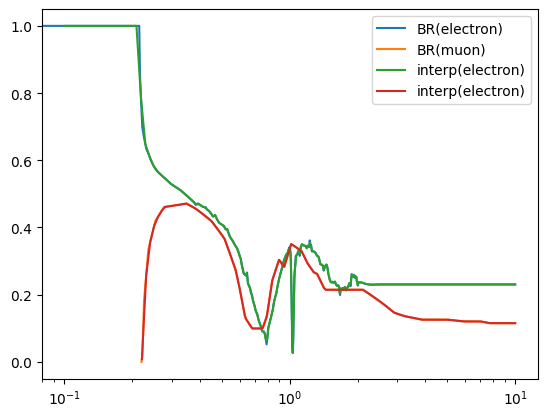

In [22]:
#epsilons
df_br_muon = pd.read_csv('Branching_Ratio/brto_muon_extracted_from_paper.csv')
df_br_muon

df_br_electron = pd.read_csv('Branching_Ratio/brtoe.csv')
df_br_electron


#df_br_muon.plot(x='x (GeV)', y='y (branching ratio)', figsize=(12,4))

xe = df_br_electron['mA[GeV]']
ye = df_br_electron['BR']

xmu = df_br_muon['x (GeV)']
ymu = df_br_muon['y (branching ratio)']

plt.plot(xe, ye, label='BR(electron)')
plt.plot(xmu, ymu, label='BR(muon)')

plt.xscale('log')


bre_interp = interpolate.interp1d(xe, ye)
brmu_interp = interpolate.interp1d(xmu, ymu)


xptse = np.linspace(0.1, 10, 1000)
xptsmu = np.linspace(0.221, 10, 1000)

yptse = bre_interp(xptse)
yptsmu = brmu_interp(xptsmu)

plt.plot(xptse, yptse, label='interp(electron)')
plt.plot(xptsmu, yptsmu, label='interp(electron)')

plt.legend()

In [23]:
#xptsmu
bre_interp(10.0)

array(0.2305)

In [26]:
# First order test case

# Read in the kappa0 from elsewhere
#df_in = pd.read_parquet('different_kappas.parquet')
#df_in = pd.read_parquet('different_kappas_03052025_many_mxs.parquet')

#df_in = pd.read_parquet('different_kappas_MANY_MX_MASSES.parquet')
#df_in = pd.read_parquet('different_kappas_TEST.parquet')

dict_results = {}
dict_results['mx'] = []
dict_results['ma'] = []
dict_results['kappa0'] = []
dict_results['alphax'] = []
dict_results['alpha_therm_or_max'] = []
dict_results['BR'] = []
dict_results['epsilon'] = []
dict_results['cap1'] = []
dict_results['sommerfeld'] = []
dict_results['rate_1yr'] = []
dict_results['rate_CMS_1yr'] = []
dict_results['rate_10yrs'] = []
dict_results['rate_CMS_10yrs'] = []
dict_results['rate_1month'] = []
dict_results['rate_CMS_1month'] = []
dict_results['livetime_years'] = []
dict_results['livetime_seconds'] = []
dict_results['depth_scale'] = []
dict_results['angular_acceptance'] = []
dict_results['final_state_particles'] = []


# Fine structure constant, natch
alpha = 1./137

# Dark fine structure constant
#alphax = 0.035

#alphax = 0.0001
#alphax = 0.17

#alphax = 1.0

# Age of Earth. Time to accumulate dark matter
tauCross = DP.tauCross
print(f"tauCross: {tauCross:.2e} seconds")
print(f"tauCross: {tauCross/3.1e7:.2e} years")
print()



#mxs = [1000]
#mxs = [100]
#mxs = [10, 100, 1000, 10000]

mxs = np.linspace(10, 90, 9).tolist()
mxs += np.linspace(100, 900, 9).tolist()
mxs += np.linspace(1000, 10000, 10).tolist()
mxs += np.linspace(10000, 90000, 9).tolist()
mxs += np.linspace(100000, 1000000, 10).tolist()


#print(mxs)
print(f"Running over {len(mxs)} values of m_X from {min(mxs)} to {max(mxs)}\n")

#mas = [1.0]
#mas = np.linspace(0.25, 10, 2500)
mas = np.linspace(0.01, 10, 250)

mas = np.linspace(0.01, 0.09, 450).tolist() + np.linspace(0.1, 0.9, 450).tolist() + np.linspace(1, 10, 450).tolist()
#print(mas)

print(f"Running over {len(mas)} values of m_a from {min(mas)} to {max(mas)}\n")

#epsilons = [1e-7, 1e-8, 1e-9]
#epsilons = np.linspace(1e-9, 1e-7, 10)
epsilons = np.linspace(1e-11, 9e-11, 9).tolist() 
epsilons = np.linspace(1e-10, 9e-10, 9).tolist() 
epsilons += np.linspace(1e-9, 9e-9, 9).tolist()
epsilons += np.linspace(1e-8, 9e-8, 9).tolist()
epsilons += np.linspace(1e-7, 9e-7, 9).tolist()
#epsilons += np.linspace(1e-6, 9e-6, 9).tolist()

#epsilons = [1e-7]

print(f"Running over {len(epsilons)} values of m_a from {min(epsilons)} to {max(epsilons)}\n")

#live_time = 1/12 # years
live_time = 1 # years

# For testing
#live_time = 10  # years

start = time.time()
for mx in mxs:

    # GET KAPPA0
    #kappa0 = kappa0_vals[mx]
    filter = df_kappa['mx'] == mx
    kappa0 = df_kappa[filter]['kappa0'].values[0]


    time_to_run = time.time() - start
    print(f"mx: {mx}    kappa0: {kappa0:.2e}     time to run: {time_to_run:.2f} s")
    start = time.time()

    for ma in mas:
        # This would give us an error in the alphaThermApprox calculation
        if ma == mx:
            continue

        #print(f"mx: {mx}    ma: {ma}")
        
        # Calculate it from the thermal relics
        #print(f"here: {mx}  {ma}")
        alphax_thermal_relics = DP.alphaTherm(mx, ma)
        alphax_max = 0.17 * (mx/1000)**1.61
        #alphax = alphax_max

        for alphax,therm_or_max in zip([alphax_thermal_relics, alphax_max], ['THERMAL', 'MAX']):
            #thermAvgSomm = DP.thermAvgSommerfeld(mx, mA, alpha_X)
            sommerfeld = DP.thermAvgSommerfeld(mx,ma,alphax)
            
            sigma = DP.sigmaVtree(mx,ma,alphax)
            
            ann = DP.cAnn(mx,sigma,sommerfeld)
    
            # Branching fractions
            #branching_fraction_to_electrons = 1
            #branching_fraction_to_muons = 0.3
            
            #mb = 0.000511
            #mc = 0.105
            #br_electrons, br_muons = calc_branching_fractions(ma, mb, mc)
            
            br_electrons = bre_interp(ma)
            
            br_muons = 0
            if ma>0.22:
                br_muons = brmu_interp(ma)
            
            #branching_fraction_to_muons = br_muons
            
            #print(f"branching fraction to muons: {branching_fraction_to_muons}")
            
            #branching_fraction_to_final_state_particles = br_electrons
            #branching_fraction_to_final_state_particles = br_muons
            #####################################################################
    
            # Scale
            # Do a rough area scale
            angular_acceptance_scale = (20**2)/(1000**2)
            
            # Do a rough depth scale, based on the energy loss in rock
            depth_scale = 1
            if mx == 10:
                depth_scale = 10 / 1000
            elif mx == 100:
                depth_scale = 100 / 1000
            else:
                depth_scale = 1000/1000
    
            for branching_fraction_to_final_state_particles, final_state_particles in zip([br_muons, br_electrons],['muons', 'electrons']):
        
                for epsilon in epsilons:
        
                    if branching_fraction_to_final_state_particles > 0:
                        cap1 = DP.cCapQuick(mx, ma, epsilon, alphax, kappa0)
                                   
                        tau = DP.tau(cap1, ann)
                        
                        gammaAnn = DP.gammaAnn(cap1,ann)
                                    
                        L = DP.decayLength(mx,ma,epsilon,branching_fraction_to_final_state_particles)
                        
                        Edecay = DP.epsilonDecay(L)
                        
                        signal = DP.iceCubeSignal(gammaAnn,Edecay,DP.yr2s(live_time))
                    
                    else:
                        tau = 0
                        gammaAnn = 0
                        L = 0
                        Edecay = 0
                        signal = 0
                        cap1 = 0
                                    
                    signal_CMS = signal*angular_acceptance_scale*depth_scale
                    
                    #print(signal)
                    #if signal>1e9:
                    #  print(f"mx: {mx:5d}  ma: {ma:4.3f}   epsilon: {epsilon:.2e}     kappa0: {kappa0:.2e}   # signal: {signal:10.2f}  # CMS signal: {signal_CMS:.2f}")
        
                    # For some reason this was getting saved as an object at times. 
                    br = branching_fraction_to_final_state_particles
                    try:
                        float(br)
                        branching_fraction_to_final_state_particles = float(branching_fraction_to_final_state_particles)
                    except ValueError:
                        print(br)
                        print(f"mx: {mx:5d}  ma: {ma:4.3f}   epsilon: {epsilon:.2e}     kappa0: {kappa0:.2e}   # signal: {signal:10.2f}  # CMS signal: {signal_CMS:.2f}")
        
                        print("Not a float")
                    
                    dict_results['mx'].append(mx)
                    dict_results['ma'].append(ma)
                    dict_results['kappa0'].append(kappa0)
                    dict_results['alphax'].append(alphax)
                    dict_results['BR'].append(branching_fraction_to_final_state_particles)
                    dict_results['epsilon'].append(epsilon)
                    dict_results['cap1'].append(cap1)
                    dict_results['sommerfeld'].append(sommerfeld)
                    dict_results['rate_1yr'].append(signal)
                    dict_results['rate_CMS_1yr'].append(signal_CMS)
                    dict_results['rate_1month'].append(signal/12)
                    dict_results['rate_CMS_1month'].append(signal_CMS/12)
                    dict_results['rate_10yrs'].append(signal*10)
                    dict_results['rate_CMS_10yrs'].append(signal_CMS*10)
                    dict_results['livetime_years'].append(live_time)
                    dict_results['livetime_seconds'].append(DP.yr2s(live_time))
                    dict_results['alpha_therm_or_max'].append(therm_or_max)
                    dict_results['depth_scale'].append(depth_scale)
                    dict_results['angular_acceptance'].append(angular_acceptance_scale)
                    dict_results['final_state_particles'].append(final_state_particles)


df_results = pd.DataFrame.from_dict(dict_results)

tauCross: 1.42e+17 seconds
tauCross: 4.58e+09 years

Running over 47 values of m_X from 10.0 to 1000000.0

Running over 1350 values of m_a from 0.01 to 10.0

Running over 36 values of m_a from 1e-10 to 9e-07

mx: 10.0    kappa0: 1.60e+27     time to run: 0.00 s
mx: 20.0    kappa0: 1.73e+28     time to run: 2.04 s
mx: 30.0    kappa0: 2.80e+28     time to run: 2.05 s
mx: 40.0    kappa0: 4.30e+28     time to run: 2.03 s
mx: 50.0    kappa0: 4.13e+29     time to run: 2.04 s
mx: 60.0    kappa0: 1.37e+29     time to run: 2.04 s
mx: 70.0    kappa0: 3.16e+28     time to run: 2.05 s
mx: 80.0    kappa0: 1.45e+28     time to run: 2.05 s
mx: 90.0    kappa0: 8.59e+27     time to run: 2.03 s
mx: 100.0    kappa0: 5.80e+27     time to run: 2.02 s
mx: 200.0    kappa0: 8.90e+26     time to run: 2.03 s
mx: 300.0    kappa0: 3.66e+26     time to run: 2.00 s
mx: 400.0    kappa0: 2.00e+26     time to run: 2.11 s
mx: 500.0    kappa0: 1.27e+26     time to run: 2.10 s
mx: 600.0    kappa0: 8.74e+25     time to ru

In [27]:
#print(df_kappa.iloc[0:5])

#print()

#print(df_in.iloc[0:5])

     mx        kappa0
0  10.0  1.601475e+27
1  20.0  1.725824e+28
2  30.0  2.798070e+28
3  40.0  4.303398e+28
4  50.0  4.130456e+29

     mx        kappa0
0  10.0  1.601475e+27
1  20.0  1.725824e+28
2  30.0  2.798070e+28
3  40.0  4.303398e+28
4  50.0  4.130456e+29


In [28]:
#filename = 'rates_electrons_alpha_max_one_month.parquet'
#filename = 'rates_muons_alpha_max_one_month.parquet'
#filename = 'rates_muons_alpha_max_one_month_HIGH_MASSES.parquet'
#filename = 'rates_muons_alpha_max_one_month_ALL_MASSES.parquet'
filename = 'rates_muons_electrons_both_alphas_ALL_MASSES.parquet'

#filename = 'rates_muons_alpha_therm_one_month.parquet'
#filename = 'rates_electrons_alpha_therm_one_month.parquet'
df_results.to_parquet(filename)


#filename = 'rates_muons_alpha_max_one_month_HIGH_MASSES.parquet'
#df_results_HM = pd.read_parquet(filename)


In [29]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9136656 entries, 0 to 9136655
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   mx                     float64
 1   ma                     float64
 2   kappa0                 float64
 3   alphax                 float64
 4   alpha_therm_or_max     object 
 5   BR                     float64
 6   epsilon                float64
 7   cap1                   float64
 8   sommerfeld             float64
 9   rate_1yr               float64
 10  rate_CMS_1yr           float64
 11  rate_10yrs             float64
 12  rate_CMS_10yrs         float64
 13  rate_1month            float64
 14  rate_CMS_1month        float64
 15  livetime_years         int64  
 16  livetime_seconds       float64
 17  depth_scale            float64
 18  angular_acceptance     float64
 19  final_state_particles  object 
dtypes: float64(17), int64(1), object(2)
memory usage: 1.4+ GB


In [30]:
df_results

,mx,ma,kappa0,alphax,alpha_therm_or_max,BR,epsilon,cap1,sommerfeld,rate_1yr,rate_CMS_1yr,rate_10yrs,rate_CMS_10yrs,rate_1month,rate_CMS_1month,livetime_years,livetime_seconds,depth_scale,angular_acceptance,final_state_particles
0,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,1.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
1,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,2.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
2,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,3.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
3,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,4.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
4,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,5.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9136651,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,5.000000e-07,8.907517e+06,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons
9136652,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,6.000000e-07,1.282682e+07,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons
9136653,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,7.000000e-07,1.745873e+07,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons
9136654,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,8.000000e-07,2.280324e+07,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons


In [31]:
#df_results.plot.scatter(x='mx', y='cap1')
#plt.xscale('log')
#plt.yscale('log')

In [32]:
for br in df_results.BR:
    try:
        float(br)
    except ValueError:
        print(br)
        print("Not a float")

In [33]:
# THIS SEEMS TO TAKE A REALLY LONG TIME WITH THE BIG FILE
'''
plt.figure(figsize=(16,4))
sns.scatterplot(df_results, x='ma', y='sommerfeld', hue='mx')
plt.ylim(0.1)
plt.yscale('log')
'''

"\nplt.figure(figsize=(16,4))\nsns.scatterplot(df_results, x='ma', y='sommerfeld', hue='mx')\nplt.ylim(0.1)\nplt.yscale('log')\n"

In [34]:
#filename = 'rates_muons_alpha_therm_one_month.parquet'

#df_results = pd.read_parquet(filename)


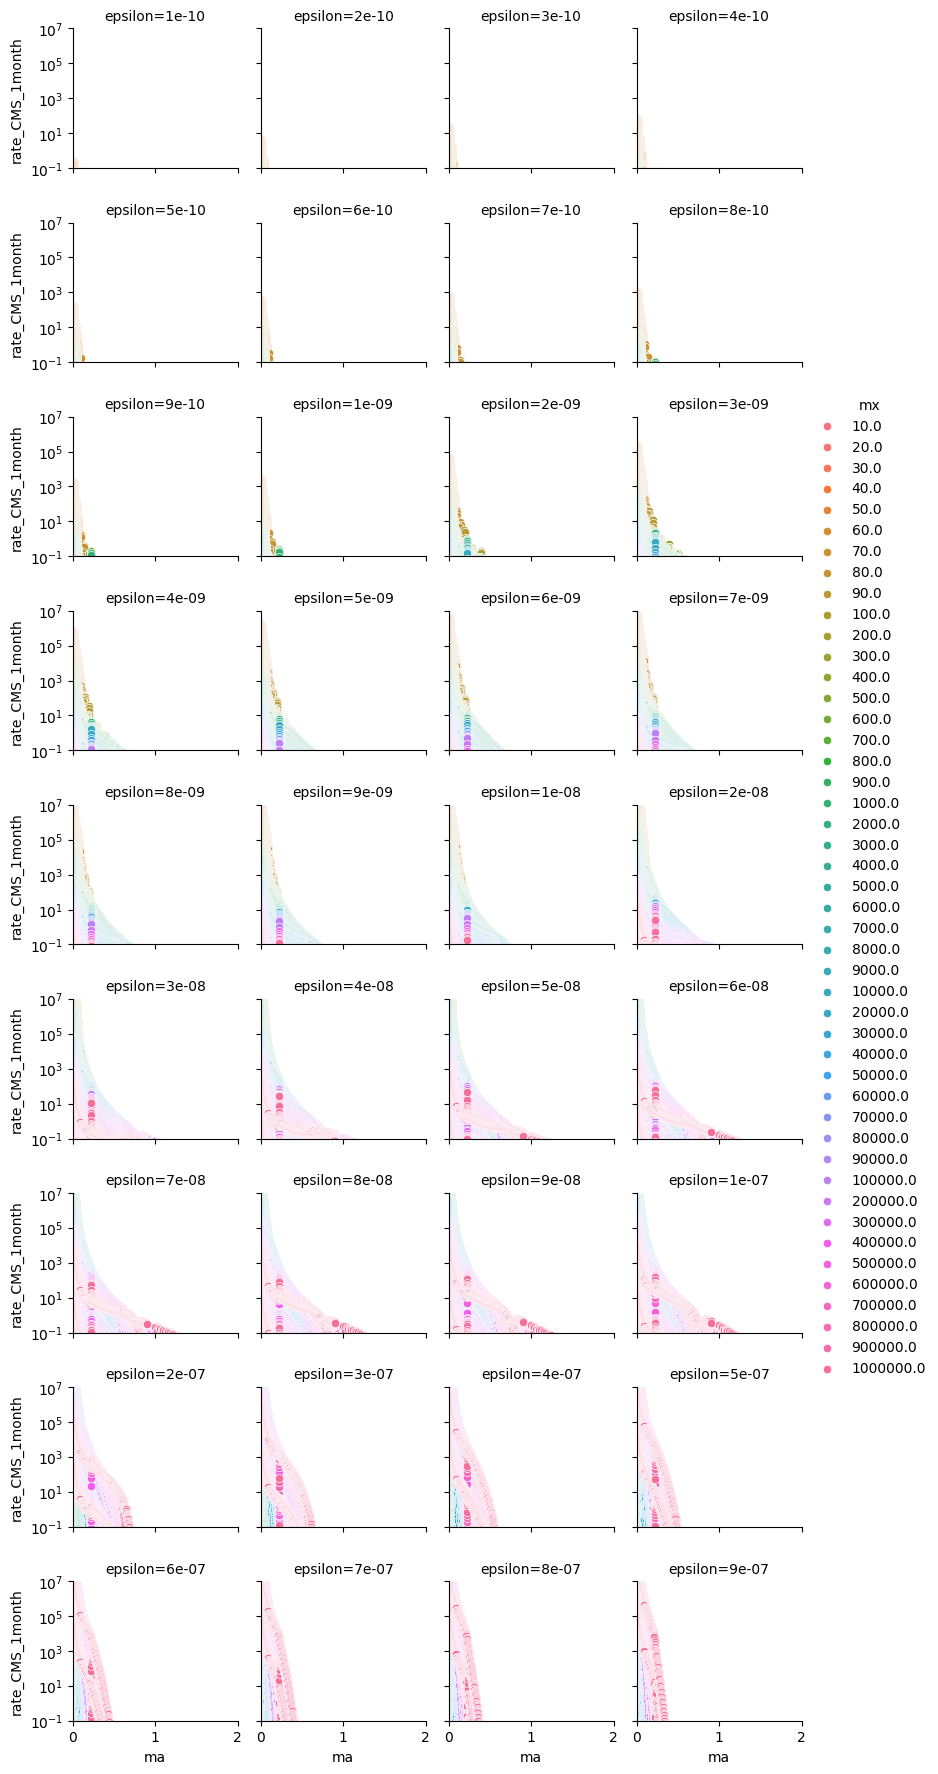

In [35]:
g = sns.FacetGrid(df_results, col='epsilon', hue='mx',  col_wrap=4, height=2)
g.map(sns.scatterplot, "ma", 'rate_CMS_1month')
#g.map(sns.scatterplot, "ma", 'rate')

# Need this to get the labels not crazy with too many decimal places
g.set_titles(template="epsilon={col_name:.0e}")

g.add_legend()

#plot = sns.scatterplot(df_results, x='ma', y='rate_CMS', hue='mx', style='epsilon', palette=sns.color_palette('tab10', n_colors=4), s=100)#, fmt='f')

plt.yscale('log')
plt.ylim(0.1,10000000)
plt.xlim(0,2)

plt.savefig('many_mxs_03062025.png')


In [36]:
#filename = 'rates_electrons_alpha_therm_one_month.parquet'
#filename = 'rates_muons_alpha_therm_one_month.parquet'
#filename = 'rates_muons_alpha_max_one_month.parquet'
#filename = 'rates_muons_alpha_max_one_month_ALL_MASSES.parquet'

filename = 'rates_muons_electrons_both_alphas_ALL_MASSES.parquet'


#filename = 'rates_electrons_alpha_therm_one_month.parquet'

df_results = pd.read_parquet(filename)


Plotting for rate rate_10yrs
0 10
1 100
2 1000
3 10000


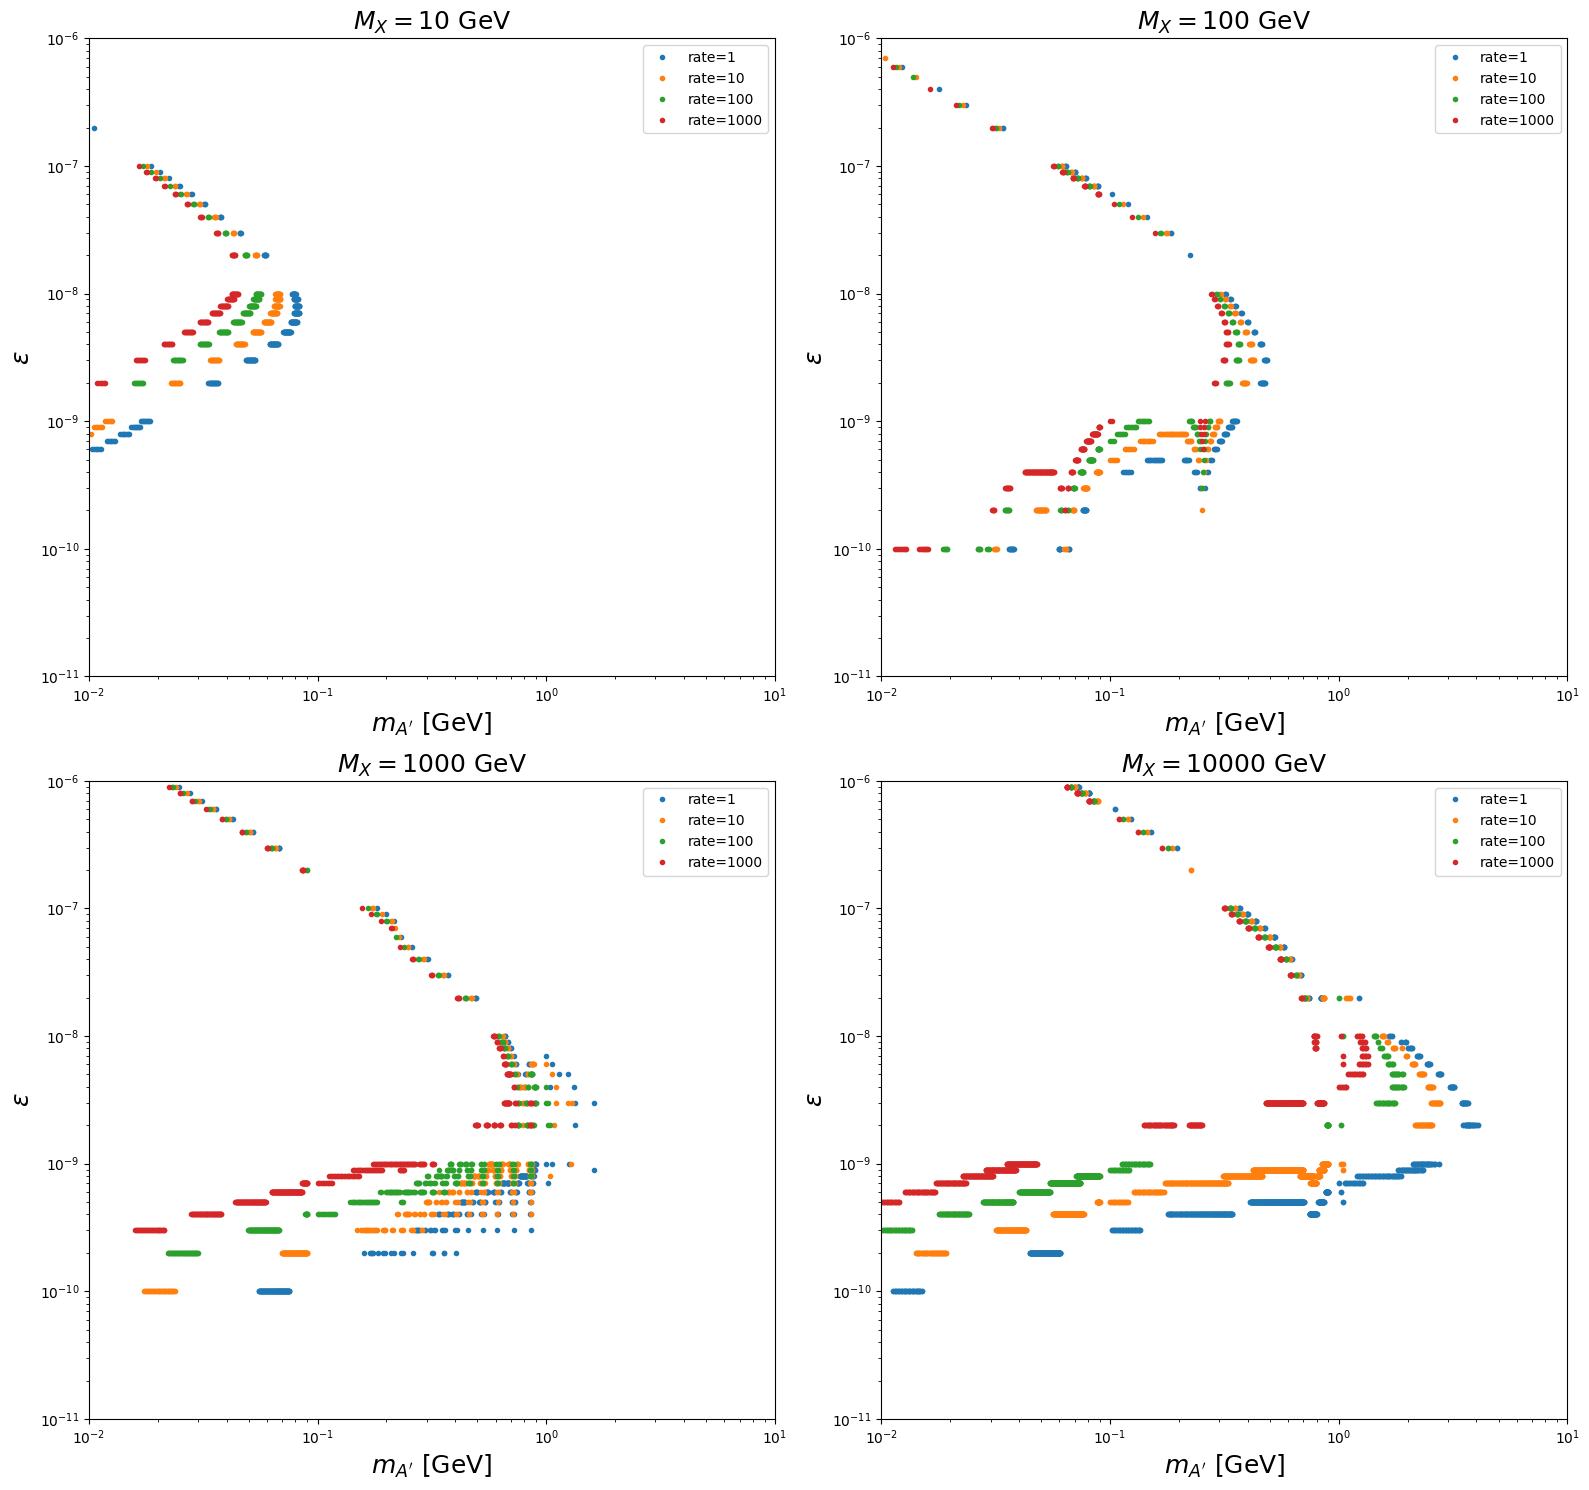

In [37]:
#rate = 10*12*df_results['rate']
#rate = 10*12*df_results['rate_CMS']

#rate = df_results['rate_CMS_1month']

#final_state_particles = 'muons'
final_state_particles = 'electrons'

alphax_assumption = 'MAX'
live_time = '10yrs'
#live_time = '1month'

rate_detector = 'rate'
#rate_detector = 'rate_CMS'

filter = (df_results['final_state_particles']==final_state_particles)
filter = filter & (df_results['alpha_therm_or_max']==alphax_assumption)

df_tmp = df_results[filter]

rate_string = f"{rate_detector}_{live_time}"
print(f"Plotting for rate {rate_string}")
rate = df_tmp[rate_string]
mx_vals = df_tmp['mx']

x = df_tmp['ma']
y = df_tmp['epsilon']

plt.figure(figsize=(16,15))


mxs = [10, 100, 1000, 10000]
#mxs = [1000, 10000, 100000, 1000000]

for idx,test_mx in enumerate(mxs):
#for idx,test_mx in enumerate([10, 100, 1000, 10000]):
#for idx,test_mx in enumerate([1000, 10000, 100000, 1000000]):

    print(f"{idx} {test_mx}")

    plt.subplot(2,2,idx+1)
    
    for expected_rate in [1, 10, 100, 1000]:
        
        filter = (test_mx == mx_vals) & (np.abs(rate-expected_rate)/expected_rate<0.3)
        #filter = filter & (df_results['final_state_particles']=='electrons')
        #filter = filter & (df_results['alpha_therm_or_max']=='MAX')

        #x = df_tmp['ma']
        #y = df_tmp['epsilon']
        
        plt.plot(x[filter], y[filter], '.', label=f'rate={expected_rate}')

        #print(test_mx, expected_rate, df_results[filter]['rate_CMS'])

    plt.xlim(0.01, 10)
    plt.ylim(1e-11, 1e-6)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$m_{A'}$ [GeV]", fontsize=18)
    plt.ylabel(r"$\epsilon$", fontsize=18)

    plt.legend()

    plt.title(f'$M_X = {int(test_mx):d}$ GeV', fontsize=18)
#plt.legend()
plt.tight_layout()

#plt.savefig("Fig3_comparison_10_years_IceCube_electrons.png")
#plt.savefig("Fig3_comparison_10_years_IceCube_muons.png")
#plt.savefig("Fig3_comparison_1_month_CMS_electrons.png")

#plt.savefig("Fig3_comparison_1_month_CMS_muons_alpha_therm.png")

#plt.savefig("Fig3_comparison_1_month_CMS_muons_alpha_max_high_masses.png")
file_string = f"Fig3_comparison_{rate_string}_{final_state_particles}_alphax_{alphax_assumption}_mX_range_{mxs[0]}_{mxs[-1]}.png"
plt.savefig(file_string)

In [38]:
df_results

,mx,ma,kappa0,alphax,alpha_therm_or_max,BR,epsilon,cap1,sommerfeld,rate_1yr,rate_CMS_1yr,rate_10yrs,rate_CMS_10yrs,rate_1month,rate_CMS_1month,livetime_years,livetime_seconds,depth_scale,angular_acceptance,final_state_particles
0,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,1.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
1,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,2.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
2,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,3.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
3,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,4.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
4,10.0,0.01,1.601475e+27,0.000244,THERMAL,0.0000,5.000000e-10,0.000000e+00,1.673554e+00,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,0.01,0.0004,muons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9136651,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,5.000000e-07,8.907517e+06,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons
9136652,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,6.000000e-07,1.282682e+07,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons
9136653,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,7.000000e-07,1.745873e+07,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons
9136654,1000000.0,10.00,3.100043e+19,11493.410582,MAX,0.2305,8.000000e-07,2.280324e+07,1.591718e+10,0.0,0.0,0.0,0.0,0.0,0.0,1,31536000.0,1.00,0.0004,electrons


In [ ]:
rate = df_results['rate_10yrs']

mx_vals = df_results['mx']

test_mx = 100

filter = (np.abs(rate-1000)<50) & (test_mx == mx_vals)



df_results[filter]#.plot.scatter(x='ma', y='BR')

In [ ]:
df_results.plot.scatter(x='mx', y='rate_CMS_1yr')

In [ ]:
from scipy.interpolate import LinearNDInterpolator


In [ ]:
alphax = df_results['alphax']

alphax.unique()

In [ ]:
test_mx = 100

mx = df_results['mx']
filter = (test_mx == mx_vals)

ma = df_results['ma'][filter]
alphax = df_results['alphax'][filter]

plt.plot(ma, alphax, '.')


In [ ]:

#rng = np.random.default_rng()

test_mx = 1000

mx = df_results['mx']

alphax = df_results['alphax']

filter = (test_mx == mx_vals)

ma = df_results['ma'][filter]
epsilon = df_results['epsilon'][filter]
rate = df_results['rate'][filter]

#x = rng.random(10) - 0.5
#y = rng.random(10) - 0.5
#z = np.hypot(x, y)

x = ma
y = epsilon
z = rate

min_rate = rate>1

X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)

#plt.pcolormesh(X, Y, Z, shading='auto')
plt.scatter(x[min_rate], y[min_rate], marker="o", c=np.log10(z[min_rate]), cmap='viridis', label="input point")
#plt.scatter(x[min_rate], y[min_rate], marker="o", c=z[min_rate], cmap='viridis', label="input point")

#plt.legend()
plt.colorbar()

plt.ylim(1e-11, 1e-6)
plt.xlim(0.01,10)
plt.yscale('log')
plt.xscale('log')



In [ ]:
#x
y
#z

In [ ]:
plt.plot(x[min_rate],z[min_rate],'.')
plt.ylim(0.1)
plt.xscale('log')
plt.yscale('log')

In [ ]:
df_results['epsilon'].unique()

In [ ]:
mx_vals = df_results['mx']
test_mx = 100
filter = (test_mx == mx_vals)

df_results[filter]

In [ ]:
# Branching ratios from their paper

df_br = pd.read_csv('Branching_Ratio/brtoe.csv')
df_br

df_br.plot(x='mA[GeV]', y='BR')
df_results.plot.scatter(x='ma', y='BR')

# Equilibrium Plots

The recipe for this section is:

1. Read in a completed $\texttt{Sommerfeld.csv}$ file
2. Extract contour data
3. Plot contours of constant $\tau/\tau_\oplus$

## Read In Sommerfeld File

The following cell reads in a $\texttt{Sommerfeld.csv}$ file and interpolates the discrete set of $\langle S_S (m_{A'})\rangle$ points into a continuous function. To save computation time, we call this interpolation during the calculation of the equilibrium time as opposed to calling the function `DarkCapPy.DarkPhton.thermAvgSommerfeld` explicitly.

In [ ]:
#sommFileName = input('Sommerfeld Data File: ')
sommFileName = '100GeVSommerfeld.csv'
sommFile = sommerfeldPath(sommFileName)
dataIn = pd.read_csv(sommFile, sep = ',')

Filem_X = float(dataIn.at[0,'mX[GeV]'])
FileKappa0 = float(dataIn.at[0,'Kappa0[GeV5]'])
print(FileKappa0)

###############################
# Set the correct units for m_X
###############################
m_XUnit = 'None'

if (Filem_X < 1000):
    m_XDisplay = Filem_X
    m_XUnit = 'GeV'

if (Filem_X >= 1000):
    m_XDisplay = Filem_X*10**-3
    m_XUnit = 'TeV'
    

# Double Check to make sure the file name matches the read-in value
print ('Input m_X: {0} GeV'.format(Filem_X))


###############################
# Interpolate Sommerfeld
###############################
maList = dataIn['mA[GeV]']
sommerfeldList = dataIn['ThermAvgSommerfeld']

# Deprecated
SommerfeldInterp = interpolate.interp1d(maList, sommerfeldList)


print ('Compete')

## Extract Equilibrium Contours

Included in this package is the function `tau` = $\tau = \sqrt{C_\text{cap}C_\text{ann}}$, which is required to plot contours of equilibrium time. The relevant ratio is is the equilibrium time relative to the age of the Earth, $\tau_\oplus$. However, generating contours of constant $\tau/\tau_\oplus$ using `matplotlib.contour` is computationally inefficient. Instead, it is much better to define a contour level by its order of magnitude, $L$ in $\tau/\tau_\oplus = 10^L$, so that:

$$ \varepsilon(m_{A'}) = 2\log(m_{A'}) -\frac{1}{2}\log(\alpha_X C_\text{ann,0} \langle S_S \rangle) - \frac{1}{2}\log(\kappa_0) - \log(\mathrm{L}  \tau_{\oplus}) $$

For a constant contour $L$, dark matter mass $m_X$, and dark matter fine structure constant $\alpha_X$, the last two terms are constant in $(\varepsilon, m_{A'})$ space.


The following cell initializes `contourDictionary`, a dictionary which stores arrays of $\varepsilon(m_{A'}$) values for different contours. The keys for `contourDictionary` are contour levels $L$ corresponding to the $\tau/\tau_\oplus = 10^\mathrm{L}$ contour. The values of `contourDictionary` are an array of two sub-arrays. The first sub-array stores $\varepsilon(m_{A'})$ with no Sommerfeld enhancements ($\langle S_S \rangle =1$). The second sub-array stores $\varepsilon(m_{A'})$ with Sommerfeld enhancements.

In [ ]:
####################################
# Create contourDictionary
####################################
# The keys of contourDictionary define the 10^key contour level
# the values are an array of plot values: [[],[]] 
# The first array is Sommerfeld off, the second array is sommerfeld on.
contourDictionary={
    '-4':[[],[]],
    '-2':[[],[]],
    '0' :[[],[]],
    '2' :[[],[]],
    '4' :[[],[]]
}

for key in contourDictionary:
    contourDictionary[key] = [[],[]]

####################################
# Initialize the x-axis
# 0.01 GeV < m_A < 10 GeV
####################################
maMin = min(maList)
maMax = max(maList)

maRange = np.logspace(np.log10(maMin), np.log10(maMax), 500, base = 10)

####################################
# Populate contourDictionary with plot values
####################################
maArray = []

for maTemp in maRange:
    maArray.append(maTemp)

for key in contourDictionary:
    contourline = float(key)
    
    for mATemp in maRange:
        Alpha_X    = DP.alphaTherm(Filem_X, mATemp)
        #print(Alpha_X)
        SigmaVTree = DP.sigmaVtree(Filem_X, mATemp, Alpha_X)
        Sommerfeld = SommerfeldInterp(mATemp)
        CannNoSomm = DP.cAnn(Filem_X, SigmaVTree)
        #print(Sommerfeld)

        #print(FileKappa0)
        EpsilonNoSomm = DP.contourFunction(mATemp, Alpha_X, CannNoSomm, 1, FileKappa0, contourline)
        EpsilonSomm   = DP.contourFunction(mATemp, Alpha_X, CannNoSomm, Sommerfeld, FileKappa0, contourline)

        #print(EpsilonSomm)
    
        contourDictionary[key][0].append(EpsilonNoSomm)
        contourDictionary[key][1].append(EpsilonSomm)


print ('Complete')

In [ ]:
#contourDictionary

## Generate Equilibrium Plots

The following cell produces a single plot of the equilibrium time. The user must specify whether the Sommerfeld enhancement is "on" or "off" by following the prompt. We also define a custom color scheme so that the contours follow a color gradient as opposed to the default `matplotlib` colors which are uncoordinated.

In [ ]:
# Define custom Color scheme
colorScheme1 = mpl.cycler(color=['#c7c47e','#94ab72','#428583','#40379f','#3d0b7e']) 

EQFig = plt.figure(figsize = (6,6))

sommParam = int(input('Sommerfeld on? No:0 Yes:1 '))
assert ((sommParam == 0) or (sommParam == 1)), 'Invalid Input, must be 0 or 1.'


########################################
# This uses a custom color scheme defined in Masterfunctions_Graphing
########################################
colors = colorScheme1
mpl.rcParams['axes.prop_cycle'] = colors

########################################
# Produce the contour lines
########################################
testFill = False
for key in contourDictionary:
    if (float(key) == 0):
        testFill = True
    assert (len(maRange) == len(contourDictionary[key][sommParam])), 'ContourDictionary is probably not populated'
    plt.plot(np.log10(maRange), (contourDictionary[key][sommParam]), label = r'10^{0}'.format(key))
    

########################################  
# Shade the valid region of parameter space   
########################################
if (testFill == True):
    xs = np.log10(maArray)
    y1 = contourDictionary['0'][sommParam]
    plt.fill_between(xs, y1, -5, color = '#E6FDFF')

########################################
# Define plot label stuff
########################################
plt.legend(loc = 'lower right', fontsize = 12)
plt.xlabel(r"$\log(m_{A'})$ $[GeV]$", fontsize = 14)
plt.ylabel(r'$\log(\varepsilon)$', fontsize = 14)

plt.title(r'$m_X = {0}$ {1}'.format(m_XDisplay, m_XUnit),\
          fontsize = 16,\
          loc = 'right')

plt.title(r'$\tau/\tau_{\oplus}$ Contours',\
          fontsize = 16,\
          loc = 'left')
plt.axis([np.log10(min(maRange)),np.log10(max(maRange)),-10,-5])
plt.grid()
plt.show()

print ('Complete')

### Save Figure

In [ ]:
filename = input('Figure Name: ')
assert (filename != ''), 'No Filename'
EQFig.savefig(filename, dpi = 700)

print ('Complete')

# IceCube Signal

The recipe for generating the $\texttt{Signal.csv}$ is:

1. Read in $\texttt{Sommerfeld.csv}$ and $\texttt{Branch.csv}$

2. Define the resolution of the signal plot

3. Check this resolution 
 
4. Initialize a template dataframe to hold the signal rate calculations

5. Generate $\texttt{Signal.csv}$

6. **This step is time consuming and computationally intensive.** <BR> Loop through signalData.csv, calculate $C_{Cap}$, $C_{Ann}$, $\Gamma_{Ann}$, and $N_{Sig}$, append them to signalData.csv

Step six can be quite lengthy depending on the desired resolution of the data points. Typically, one would begin these calculations and be forced to wait until they are completed in their entirety; perhaps unable to shut down their machine for hours at a time. However, the cell "Signal.csv Calculations" can be interrupted at any time, by interrupting the Jupyter kernel, and resumed later. This allows the user to run the calculation in multiple stages instead of dedicating a large chunk of time and running the calculation all at once. If the calculation is interrupted, run the "Manual Overwrite" cell to guarentee that the dataframe stored in Jupyter memory is written to $\texttt{Signal.csv}$.

## Initialize Signal.csv

### Read in External Files

In this cell, the user inputs two files:

1. A completed $\texttt{Sommerfeld.csv}$
2. A csv containing the branching ratio for a given dark photon decay process, $\texttt{Branch.csv}$

We provide the file `brtoe.csv` for the process $A' \rightarrow e^+e^-$ from [arXiv:1505.07459](https://arxiv.org/abs/1505.07459).

In [ ]:
SommFileName = input('Sommerfeld File: ')
SommFile = pd.read_csv(sommerfeldPath(SommFileName))

branchFileName = (input('Branching File: '))
branchFile = pd.read_csv(branchPath(branchFileName))

print ('Complete')

### Define the Resolution of the Signal Plot

This cell defines the resolution of the signal plot and consequently for example the sampling of the Sommerfeld enhancement. 

This cell initializes the variable `num_Signal` which represents the resolution of the Signal plot. If If `num_Signal = 50`, the signal plot will have a $50 \times 50$ resolution. Consequently, the Sommerfeld enhancement and branching ratio interoplations will also have `num_Signal` sampling points. Ideally, the resolution would be very large, `num_Signal ~ 2000`, but the number of calculations for the signal plot scales as `num_Signal`$^2$. There is a clear tradeoff between resolution and computation time. Therefore, it is useful to tune the resolution as needed in order to minimize calculation time. See [Sommerfeld Data Interpolation](#Sommerfeld-Data-Interpolation) for a more detailed discussion of tuning the resolution.

For the provided $\texttt{Sommerfeld.csv}$ file titled `100GeVSommerfeld.csv`, the suggested resolution is `num_Signal = 200`. As `m_x` increases, the Sommerfeld resonances become more closely spaced and `num_Signal` must increase to capture these finer resonance peaks.

To demonstrate what `num_Signal` controls, read in `100GeVSommerfeld.csv` in the cell above and compare the Sommerfeld plots with `num_Signal = 40` to `num_Signal = 200`.

In [ ]:
num_Signal = 10

print ('Complete')

### External File Interpolations

The following cell creates interpolations of the:

1. Sommerfeld enhancement

2. Branching ratio

The file names for both of these files is written to the $\texttt{Signal.csv}$ file. This facilitates resuming the calculation if it is interrupted. If the main calculation cell is interrupted and the Jupyter kernel is closed, all of the variables loaded into Jupyter memory are wiped. Once the caluclation resumes for a given $\texttt{Signal.csv}$ file, the user must load the particular $\texttt{Sommerfeld.csv}$ and $\texttt{Branch.csv}$ files back into Jupyter memory. Writing both of these file names into the $\texttt{Signal.csv}$ file solves this problem, allowing the user to resume the calculation by running a single cell as opposed to multiple cells.

#### Sommerfeld Data Interpolation

In this cell, we generate two plots of the Sommerfeld enhancement to help inform an appropriate value for `num_Signal`. 

To tune the resolution parameter, we focus on the Sommerfeld enhancement. This is because the Sommerfeld enhancement contains narrow resonance peaks that are not be accurately captured in the interpolation unless the resolution is adequate. If `num_Signal` is too low, the sampling yields an artifically jagged enhancement. To illustrage this point, we generate two graphs of the Sommerfeld enhancement. The left plot is generated with a sampling of `num_Signal` points, the right plot is generated using all points from the $\texttt{Sommerfeld.csv}$ file.

In [ ]:
####################################
# Interpolate Sommerfeld data
####################################
mAData = SommFile['mA[GeV]']
SommData = SommFile['ThermAvgSommerfeld']
SommInterp = interpolate.interp1d(mAData,SommData)

####################################
# Create Comparison Plots
####################################
m_XSommerfeld = SommFile.loc[0,'mX[GeV]']
kappa0Sommerfeld = SommFile.loc[0,'Kappa0[GeV5]']


vect1 = [] # To store m_A values
vect2 = [] # To store Sommerfeld values
for ma in np.logspace(np.log10(min(mAData)),np.log10(max(mAData)), num_Signal, base = 10):
    vect1.append(ma)
    vect2.append(SommInterp(ma))
        
        

fig1 = plt.figure(figsize = (14,6))
plt.suptitle('Comparison of Sommerfeld Resolutions', fontsize = 18)

ax1 = fig1.add_subplot(1,2,1)
ax1.plot(np.log10(vect1),np.log10(vect2),color = '#1f77b4')
ax1.set_xlabel(r"$\log(m_{A'})$ [GeV]", fontsize = 14)
ax1.set_ylabel(r"$\log(\langle S_S \rangle)$", fontsize = 14)
ax1.set_title('num_Signal = {0} Resolution'.format(num_Signal), fontsize = 14, loc = 'right')
plt.grid()

ax2 = fig1.add_subplot(1,2,2)
ax2.plot(np.log10(mAData), np.log10(SommData), color = '#1f77b4')
ax2.set_xlabel(r"$\log(m_{A'})$ [GeV]", fontsize = 14)
ax2.set_ylabel(r"$\log(\langle S_S \rangle)$", fontsize = 14)
ax2.set_title('num_Somm = 2500 Resolution', fontsize = 14, loc = 'right')
plt.grid()


print ('Complete')

#### Branching Ratio Interpolation

This cell reads in $\texttt{Branch.csv}$ and create an interpolation of the branching ratio as a function of mediator mass. The branching ratio file provided, `brtoe.csv` was created by taking Figure 2 from [arXiv:1505.07459](https://arxiv.org/abs/1505.07459) and creating a csv file using [Web Plot Digitizer](https://automeris.io/WebPlotDigitizer/).

Similar to the sampling of the Sommerfeld effect, the sampling of the branching ratio also depends on `num_Signal`. In the following cell, we provide output similar to the Sommerfeld plots. The left plot is the branching ratio using a sampling of `num_Singal` points. The plot on the right uses all points in the $\texttt{Branch.csv}$ file.

In [ ]:
xListBranch = branchFile['mA[GeV]']
yListBranch = branchFile['BR']

branchRatioInterp = interpolate.interp1d(xListBranch, yListBranch)

############################
# Number of data points
############################
num_Branch = len(xListBranch)


############################
# Set low and high m_A values for plotting
############################
m_AHigh = max(xListBranch)

# Get around Branching ratio starting at m_A = 0 GeV
if (min(xListBranch) == 0):
    m_ALow = 10**-1 # ArXiV Fig 2 starts at m_A = 0.1 GeV so we start there as well

else:
    m_ALow = min(xListBranch)
    
    
############################
# Create data for plots
############################
vect1 = [] # To store m_A values
vect2 = [] # To store Branching ratio values
for ma in np.logspace( np.log10(m_ALow), np.log10(m_AHigh), num_Signal, base = 10):
    vect1.append(ma)
    vect2.append(branchRatioInterp(ma))


fig2 = plt.figure(figsize = (14,6))
plt.suptitle('Comparison of Branching Ratio Resolutions', fontsize = 18)

ax3 = fig2.add_subplot(1,2,1)
ax3.plot((vect1),(vect2), color = '#1f77b4')
ax3.set_xlabel(r"$m_{A'}$ [GeV]", fontsize = 14)
ax3.set_ylabel(r"Branching Ratio: $A' \rightarrow e^+ + e^-$", fontsize = 14)
ax3.set_title('num_Signal = {0} Resolution'.format(num_Signal), fontsize = 14, loc = 'right')
plt.grid()

ax2 = fig2.add_subplot(1,2,2)
ax2.plot((xListBranch), (yListBranch), color = '#1f77b4')
ax2.set_xlabel(r"$m_{A'}$ [GeV]", fontsize = 14)
ax2.set_ylabel(r"Branching Ratio: $A' \rightarrow e^+ + e^-$", fontsize = 14)
ax2.set_title('num_Branch = {0} Resolution'.format(num_Branch), fontsize = 14, loc = 'right')
plt.grid()


print ('Complete')

### Initialize Signal Dataframe

This cell:

1. Initializes the signal data frame

2. Appends `num_Signal` $\varepsilon$ and $m_{A'}$ points. By default, the range for mediator mass and kinetic mixing are dictated by the range of $m_{A'}$ in the Sommerfeld file, and $10^{-11} \leq \varepsilon \leq 10^{-5}$. To change the range of $\varepsilon$, adjust the arguments of the variable `epsilonLogRange`.

3. Appends the column headers to the data frame

The columns are as follows. If the column values have units, we have included units in square brackets in the column headers.

- `counter`: Explicitly stores the current row of the file. This is used as a loop variable to resume the calculation should it be stopped.

- `mX[GeV]`: Stores the value of $m_X$ taken directly from the $\texttt{Sommerfeld.csv}$ file

- `mA[GeV]`: Stores `num_Signal` values of $m_A$ in the range $0.01 \ \text{GeV} \leq m_{A'} \leq 10 \ \text{GeV}$

- `Epsilon`: Stores `num_Signal` values of $\varepsilon$ in the range $10^{-11} \leq \varepsilon \leq 10^{-5}$

- `Capture[s-1]`: Stores the value of $C_\text{cap}$ for the values in the corresponding row

- `Annihilation[s-1]`: Stores the value of $C_\text{ann}$ for the values in the corresponding row

- `GammaAnn[s-1]`: Stores the value of $\Gamma_\text{ann}$ for the values in the corresponding row

- `IceCubeSignal`: Stores the value of $N_{sig}$ for the values in the corresponding row

- `LiveTime[s]`: Stores the live time of the experiment in seconds. By default, this is 10 years.

- `SommerfeldFile`: Stores the name of the working Sommerfeld file

- `BranchingRatioFile`: Stores the name of the working branching ratio file

- `Resolution`: Stores the value for the parameter `num_Signal`

- `Kappa0[GeV5]`: Stores the value of $\kappa_0$ taken directly from the $\texttt{Sommerfeld.csv}$ file

In [ ]:
#########################################
# Define parameter space Ranges
#########################################
# Logarithmic Spacing because we plot this in log-log space
# 0.01 GeV < mA < 10 GeV
# 10^-11 < Epsilon < 10^-5

ma_Min = (min(mAData))
ma_Max = (max(mAData))

epsilon_Min = 10**-11
epsilon_Max = 10**-5

# Use Logarithmic spacing since we plot the log of everything
mALogRange = np.logspace(np.log10(ma_Min), np.log10(ma_Max), num_Signal, base = 10)
epsilonLogRange = np.logspace(np.log10(epsilon_Min), np.log10(epsilon_Max), num_Signal, base = 10)

#########################################
# Initialize Master Arrays
#########################################
masterSignalArray = []

#########################################
# Populate the Master Arrays with the column headers and 'None' Cells
#########################################
counter = 0
for mATemp in mALogRange:
    for epsilonTemp in epsilonLogRange:
        masterSignalArray.append([counter, ' ', mATemp, epsilonTemp, \
                                  'None', 'None', 'None', 'None', ' ', \
                                  ' ', ' ', ' ', ' '])
        counter +=1
#########################################
# Create a PANDAS DataFrame from the Master Arrays
#########################################
masterSignalDataframe = pd.DataFrame(data = masterSignalArray, \
    columns=['Counter', 'mX[GeV]', 'mA[GeV]', 'Epsilon',\
             'Capture[s-1]', 'Annihilation[s-1]', 'GammaAnn[s-1]', 'IceCubeSignal', 'LiveTime[s]', \
             'SommerfeldFile', 'BranchingRatioFile','Resolution','Kappa0[GeV5]'])

print ('Complete')

### Write to External .csv File

This cell writes the signal data frame to an external csv file. The naming convention should follow the convention outlined in the [Create Sommerfeld.csv](#Create-Sommerfeld.csv) section, namely:
    
    <#><unit>Signal.csv

So for $m_X = 100$ GeV, the corresponding signal file is named:

    100GeVSignal.csv

This is the final step before starting the time-consuming calcuation process to populate $\texttt{Signal.csv}$ with data. As a final check, we prompt the user for input to ensure that all model and experimental parameters are correct before starting the calculations.

In [ ]:
signalFileName = input('Signal Rate filename: ')
if signalFileName == '':
    print ("Using default filename")
    signalFileName = 'Signal_DEFAULT.csv'
signalFile = signalPath(signalFileName)
assert (signalFileName[-4:] == '.csv'), 'Must inclue ".csv" in the file name'

#############################
# Double check that these values are correct
#############################
liveTime = DarkCapPy.Configure.Conversions.yr2s(10)

print ('--------------------')
print ('You are about to write the following to {0}'.format(signalFileName))
print ('mX[GeV]               : {0}'.format(m_XSommerfeld))
print ('mA_Low[GeV]           : {0}'.format(ma_Min))
print ('mA_High[GeV]          : {0}'.format(ma_Max))
print ('Epsilon_Low           : {0}'.format(epsilon_Min))
print ('Epsilon_High          : {0}'.format(epsilon_Max))
print ('Kappa0[GeV5]          : {0}'.format(kappa0Sommerfeld))
print ('Observation Time[sec] : {0}'.format(liveTime))
print ('Sommerfeld File       : {0}'.format(SommFileName))
print ('Branching Ratio File  : {0}'.format(branchFileName))
print ('Resolution            : {0}'.format(num_Signal))
print ()

yesNo = input ('Write to {0}.csv? (y/n) '.format(signalFileName))
assert (yesNo == 'y' or yesNo == 'n'), 'Invalid input, must be "y" or "n."'

if ((yesNo == 'y') or (yesNo == 'Y')):
    kappa0Value = 'None'
    m_XValue = 'None'
    
    masterSignalDataframe.at[0, 'mX[GeV]']            = m_XSommerfeld
    masterSignalDataframe.at[0, 'Kappa0[GeV5]']       = kappa0Sommerfeld
    masterSignalDataframe.at[0, 'LiveTime[s]']        = liveTime
    masterSignalDataframe.at[0, 'SommerfeldFile']     = SommFileName
    masterSignalDataframe.at[0, 'BranchingRatioFile'] = branchFileName
    masterSignalDataframe.at[0, 'Resolution']         = num_Signal

    masterSignalDataframe.to_csv(signalFile, index=False)
    
    print ('Write executed')
    
else:
    print ('Write aborted')

print ('Complete')

----------------------

## Signal.csv Calculations

** This cell is the main work-horse of this notebook**

This is the cell where the $\texttt{Signal.csv}$ file is populated with $N_\text{sig}$ values by scanning over $m_{A'}$ and $\varepsilon$. To begin or resume calculations for a $\texttt{Signal.csv}$ file, this is the single cell to run. 

The algorithm is:
1. Input an incomplete $\texttt{Signal.csv}$ file
2. Create a backup of that file. This ensures that even if the calculation is interrupted and the manual overwrite is not run, that not all data will be lost.
3. Generate interpolations of the Sommerfeld effects and branching ratio 
4. Iterate through the `counter` column looking at the value of `IceCubeSignal`
    4. If `IceCubeSignal` is `None`, compute all values in that row
    4. Else, continue to loop
5. Append newly calculated values to $\texttt{Signal.csv}$
6. Overwrite $\texttt{Signal.csv}$
7. Loop steps 2-6 until all rows are calculated


Since this is the main working cell in this notebook, a number of features have been implimented for user-convenience.

After user generates a $\texttt{Signal.csv}$ file following the steps above, this cell calculates and populates a signal file. Depending on the resolution of the plot, this calculation may take $\mathcal{O}(10 \ \text{hours})$ to complete. This cell saves each iteration to $\texttt{Signal.csv}$ so that in case the Jupyter kernel is interrupted, the calculation may be resumed at another time. If the calculation is interrupted, one must run the cell titled Manual Overwrite to avoid data loss. 

To resume this calculation, simply run this cell and input the incomplete $\texttt{Signal.csv}$ file to continue calculations. The algorithm will iterate through the `counter` column until it finds a row which has not been calculated.

As a benchmark, with a resolution of `num_Signal = 200`, the upper left plot of Fig. 3 in [arXiv:1509.07525](https://arxiv.org/abs/1509.07525) took about 8 hours of run time on a modern laptop.

In [ ]:
#########################################
# Read in Signal File
#########################################
signalFileName = input('Signal Rate File: ')
signalFile = signalPath(signalFileName)
signalDataIn = pd.read_csv(signalFile, sep = ',')

#########################################
# Create backup of Signal File 
#########################################
now = datetime.now()
timeStamp = now.strftime('%b-%d_%H.%M')
signalFileNameCopy = signalFileName[:-4] + '_' + timeStamp + '.csv'
signalDataIn.to_csv(signalBackupPath(signalFileNameCopy), sep=',', index=False)
print ('Backup Created')


#########################################
# Constants in (mA, epsilon) space:
#########################################
signalm_X = float(signalDataIn.at[0, 'mX[GeV]'])
FileKappa0 = float(signalDataIn.at[0, 'Kappa0[GeV5]'])
Alpha = 1./137
LiveTime = float(signalDataIn.at[0, 'LiveTime[s]'])


#########################################
# Sommerfeld Interpolation
#########################################
sommFileName = signalDataIn.at[0,'SommerfeldFile']
sommDataIn = pd.read_csv(sommerfeldPath(sommFileName))
mAData = sommDataIn['mA[GeV]']
SommDataValues = sommDataIn['ThermAvgSommerfeld']
SommInterp = interpolate.interp1d(mAData,SommDataValues)

#########################################
# Branching Ratio Interpolation
#########################################
branchFileName = signalDataIn.at[0,'BranchingRatioFile']
branchDataIn = pd.read_csv(branchPath(branchFileName))
mABranch = branchDataIn['mA[GeV]']
branchingDataValues = branchDataIn['BR']
branchRatioInterp = interpolate.interp1d(mABranch,branchingDataValues)


#########################################
# Begin iterating through the file
#########################################
loopRange = range(0,len(signalDataIn['Counter']))
print ()
print ('--------------------')
finishedCounter = 0
index = 0
for index in loopRange:
    testValue = signalDataIn.loc[index, 'IceCubeSignal']
    
    if (testValue == 'None'):
        #########################################
        # Initialize iteration-specific Quantities
        #########################################
        signalm_ATemp = float(signalDataIn.at[index, 'mA[GeV]'])
        FileEpsilonTemp = float(signalDataIn.at[index, 'Epsilon'])
        Alpha_X = DP.alphaTherm(signalm_X, signalm_ATemp)      
#         Sommerfeld = SommInterp(signalm_ATemp)
        Sommerfeld = 1
        BranchingRatio = branchRatioInterp(signalm_ATemp)
        
        #########################################
        # Parameter Spce Calculations
        #########################################
        Capture = DP.cCapQuick(signalm_X, signalm_ATemp, FileEpsilonTemp, Alpha_X, FileKappa0)
        SigmaVTree = DP.sigmaVtree(signalm_X, signalm_ATemp, Alpha_X)
        Annihilation = DP.cAnn(signalm_X, SigmaVTree, thermAvgSomm = Sommerfeld)
        GammaAnn = DP.gammaAnn(Capture, Annihilation)
        L = DP.decayLength(signalm_X, signalm_ATemp, FileEpsilonTemp, BranchingRatio)
        EpsilonDecay = DP.epsilonDecay(L)
        
        IceCubeSignal = DP.iceCubeSignal(GammaAnn, EpsilonDecay, LiveTime)

        #########################################
        # Append Calculated Values to SignalFile.csv
        #########################################
        signalDataIn.at[index, 'Capture[s-1]']      = Capture
        signalDataIn.at[index, 'Annihilation[s-1]'] = Annihilation
        signalDataIn.at[index, 'GammaAnn[s-1]']     = GammaAnn
        signalDataIn.at[index, 'IceCubeSignal']     = IceCubeSignal
        
        
        #########################################
        # Overwrite SignalFile.csv
        #########################################
        signalDataIn.to_csv(signalFile, sep=',',index=False) 
        finishedCounter += 1
        
        if (index % 20 == 0):
            print ('Calculations for index: {0} recorded'.format(index))
        
    elif (testValue != 'None'):
        finishedCounter += 1
    
    if (finishedCounter == len(signalDataIn['Counter'])):
        print ('--------------------')
        print ('All Calculations Complete')
        break
        
print ('Complete')

### Manual Overwrite

This cell is the manual overwrite of the $\texttt{Signal.csv}$ file.

If the previous cell has been interrupted, this cell must be run to write the data stored in Jupyter memory into $\texttt{Signal.csv}$. This is because if the Jupyter kernel happens to be interrupted during the `to_csv` function, there is a chance the entire $\texttt{Signal.csv}$ file will be blank. The manual overwrite cell writes the dataframe stored in Jupyter memory to $\texttt{Signal.csv}$ to ensure that no data will be lost in the interruption process. Failure to run the manual overwrite cell after interruption may result in a loss of the data stored in $\texttt{Signal.csv}$.

In [ ]:
'''
print ('Working Signal File: {0}'.format(signalFileName))

overwrite = input('Overwrite? (y/n): ')
if ((overwrite == 'y') or (overwrite == 'Y')):
    signalDataIn.to_csv(signalFile, sep=',',index=False) 
    print ('Overwrite complete')
    
else:
    print ('Overwrite aborted')

print ('Complete')
'''

***

## Plot Signal Events

This cell reads in a completed $\texttt{Signal.csv}$ and plots the mediator mass $m_{A'}$ on the horizontal axis, the kinetic mixing parameter $\varepsilon$ on the vertical axis, and the signal event contours $N_\text{sig} = \{ 1, 10, 100, 1000 \}$ at IceCube.

If an incomplete $\texttt{Signal.csv}$ file is read into this cell, Python will throw:
```python
AttributeError: 'str' object has no attribute 'log10'
```

In [ ]:
signalFile = input('Signal Rate filename: ')
readFile = signalPath(signalFile)
rawData = pd.read_csv(readFile)
Filem_X = float(rawData.loc[0,'mX[GeV]'])

#Pull out min / max values on each axis
xMin = min(rawData['mA[GeV]'])
xMax = max(rawData['mA[GeV]'])
yMin = min(rawData['Epsilon'])
yMax = max(rawData['Epsilon'])


#########################################
# Define the dimension of the grid. 
# For an n x n grid, this will pull out the number "n"
#########################################
gridDim = int(rawData.loc[0,'Resolution'])


#########################################
# Create the n x n grid
#########################################
# Logarithmic Spacing
xLogRange = np.logspace(np.log10(xMin), np.log10(xMax), gridDim, base = 10)
yLogRange = np.logspace(np.log10(yMin), np.log10(yMax), gridDim, base = 10)


#########################################
# Read in and reshape the Contour data
#########################################
# This reads in contour data as a single column,
#     but we reshape it to a 2D, n x n array to fit the grid

z = [rawData['IceCubeSignal']]
SignalData = np.reshape(z, (len(xLogRange), len(yLogRange)))



###############################
# Set the correct units for m_X
###############################
m_XUnit = 'None'
if (Filem_X < 1000):
    m_XDisplay = Filem_X
    m_XUnit = 'GeV'

if (Filem_X >= 1000):
    m_XDisplay = Filem_X * 10**-3
    m_XUnit = 'TeV'
    
    
###############################
# Plotting
###############################
signalFig = plt.figure(figsize = (6,6))

CP = plt.contour(np.log10(xLogRange), np.log10(yLogRange), \
                 np.log10(SignalData.transpose()),\
                 levels=[0,1,2,3],\
                )

xLabelNums = [-2,-1,0,1]
xLabelText = [r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$',r'$10^{1}$']

yLabelNums = [-5,-6,-7,-8,-9,-10,-11]
yLabelText = [r'$10^{-5}$', r'$10^{-6}$', r'$10^{-7}$', r'$10^{-8}$', \
              r'$10^{-9}$', r'$10^{-10}$', r'$10^{-11}$']


plt.xticks(xLabelNums, xLabelText, fontsize = 12)
plt.yticks(yLabelNums, yLabelText, fontsize = 12)

plt.xlabel(r"$m_{A'}$ $[GeV]$", fontsize = 14)
plt.ylabel(r'$\varepsilon$', fontsize = 18)
plt.suptitle('IceCube Events', fontsize = 16)
plt.title(r'$m_X$ = {0} {1}'.format(m_XDisplay, m_XUnit), loc = 'right', fontsize = 13)

labels = [r'1', r'$10$',r'$10^2$',r'$10^3$']
#for i in range(len(labels)):
#    CP.collections[i].set_label(labels[i])

plt.legend(loc='upper right', fontsize = 13)
plt.grid()

print ('Complete')

In [ ]:
SignalData

### Save Figure

In [ ]:
figName = input('Filename: ')

signalFig.savefig((figName), dpi = 700,
             bbox_inches = 'tight', # If this isn't here, it partially cuts off the axis labels
            )
print ('Complete')